### Import Packages

- It is not allowed for you to use packages other than the specified packages below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from IPython.display import Image

## Task 1. Support Vector Machine (SVM)

#### 1. Load Dataset [1 point]

- Load the csv file,'X_dataset.csv' as `X`
- Load the csv file, 'y_dataset.csv' as `y`

In [2]:
X = pd.read_csv("X_dataset.csv")
y = pd.read_csv('y_dataset.csv')

#### 2. Split Dataset into the train & testset [1 point]
** When you use scikit-learn method to split the train & test set : 
- the `random_state` value has to be zero.
- the ratio of train set and test set is as follows : 75% train set / 25% test set
- Assign the variable names as follows : `X_tn`, `X_te`, `y_tn`, `y_te`

In [3]:
X_tn, X_te, y_tn, y_te = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 0)

#### 3. Standardize the dataset by "StandardScaler" method of scikit-learn [1 point]
- Use the method as the default state
- Fit the `StandardScaler` on your training data only, then standardize both training and test sets using that scaler. The reason we fit a scaler on the training set is to avoid possible information leakage from the test dataset. Test dataset should always remain "Unseen" until the testing phase. Thus, we should always scale using the training set.

In [4]:
scaler = StandardScaler()
X_tn_norm = scaler.fit_transform(X_tn)
X_te_norm = scaler.transform(X_te)

#### 4. Load and train a support vector machine classifier (SVC) by scikit-learn. [10 points]
- Use only two parameters of `SVC` : `kernel`, and `random_state`.
- Assign `model1` to `SVC` with `kernel` set to `linear`, and set `random_state` as 0.
- Assign `model2` to `SVC` with `kernel` set to `rbf`, and set `random_state` as 0.

In [5]:
y_tn = np.ravel(y_tn)
y_te = np.ravel(y_te)
model1 = SVC(kernel = 'linear', random_state = 0)
clf1 = model1.fit(X_tn_norm, y_tn)
model2 = SVC(kernel = 'rbf', random_state = 0)
clf2 = model2.fit(X_tn_norm, y_tn)

#### 5. Predict and evaluate the two models on your test set [3 points]

- Predict class labels of the test set using the two trained models, including `model1` and `model2`.
- For each of the two models, assign `pred1` and `pred2` to each predicted result accordingly, and print `pred1` and `pred2`.

In [6]:
pred1 = model1.predict(X_te_norm)
pred2 = model2.predict(X_te_norm)
print(pred1)
print(pred2)

[1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1.]
[1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0.]


### 6. Evaluate the prediction of your models. 

- Evaluate the trained model using accuracy metric on the test set.
(Evaluate how well the predicted label of the test set matches the actual correct answer value.)
- Print the accuracy score value

#### 6.1. Fill in the blank of the accuracy function to calculate accuracy score. [2 points]

In [7]:
def accuracy(y_true, y_pred):
    
    """
    Calculate the accuracy rate from the predicted target value and the actual target value.
    
    Inputs
    ------
    y_true: actual target value
    y_pred: predicted target value

    Outputs
    -------
    calculataed accuracy rate

    """
    # TODO: Compute the accuracy rate
    
    pred_correct = sum(y_true == y_pred)
    total_test_samples = len(y_true)
    
    accuracy = pred_correct / total_test_samples

    return accuracy

#### 6.2. Print each accuracy score for `model1` and `model2`. [2 points]
- Assign an `accuracy1` to the accuracy score for `model1`.
- Assign an `accuracy2` to the accuracy score for `model2`.
- Print both `accuracy1` and `accuracy2`.

In [8]:
# print the accuracy score on your test set
accuracy1 = accuracy(y_te, pred1)
accuracy2 = accuracy(y_te, pred2)
print(f"Accuracy 1: {accuracy1}")
print(f"Accuracy 2: {accuracy2}")

Accuracy 1: 0.8
Accuracy 2: 0.84


#### 7. Plot graphs 
[overall instruction]
- Plot test data points using the `matplotlib.pyplot` library
- The meaning of dependent variable is such as: 
-    1 : positive (breast cancer)
-    0 : negative (breast cancer)
- For label 1 and label 0, plot those labels by assigning different colors or symbols.
- Draw the *decision boundary* per each model.

#### 7.1. Plot test data points and draw a decision boundary of `model1`. [4 points]

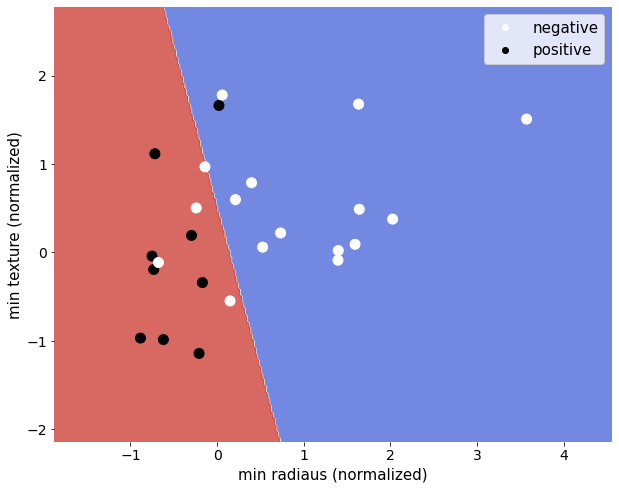

In [9]:
plt.figure(figsize = (10,8))

def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    result = ax.contourf(xx, yy, Z, **params)
    return result

X0, X1 = X_te_norm[:, 0], X_te_norm[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(plt.gca(), clf1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
scatter = plt.scatter(X0, X1, c = y_te, cmap = plt.cm.gist_yarg, s = 100)
plt.legend(handles = scatter.legend_elements()[0], labels = ['negative','positive'], fontsize = 15)
plt.xlabel('min radiaus (normalized)', fontsize = 15)
plt.ylabel('min texture (normalized)', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

#### 7.2. Plot test data points and draw a decision boundary of `model2`. [4 points]

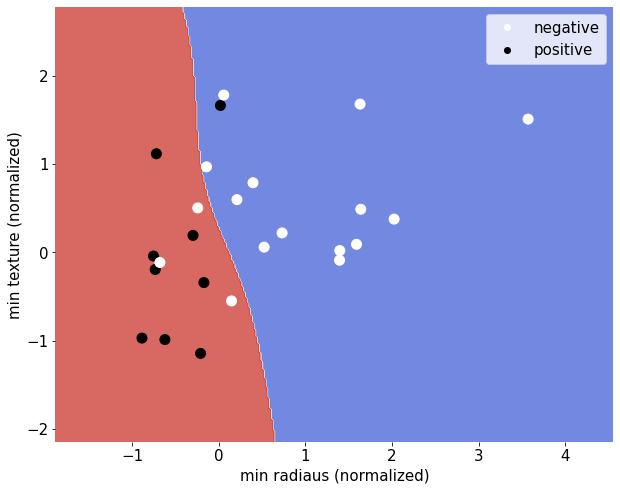

In [10]:
plt.figure(figsize = (10,8))


plot_contours(plt.gca(), clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
scatter = plt.scatter(X0, X1, c = y_te, cmap = plt.cm.gist_yarg, s = 100)
plt.legend(handles = scatter.legend_elements()[0], labels = ['negative','positive'], fontsize = 15)
plt.xlabel('min radiaus (normalized)', fontsize = 15)
plt.ylabel('min texture (normalized)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

#### 7.3. Describe the difference between two plots and explain why the accuracy score of a particular model is better than the other based on the two plots. [3 points]

We can see that the performance of model1 (linear SVM) and model2 (non-linear SVM) are not too different from each other. This is because the test data is approximately linearly separable, which is evident from the above graphs. The reason why the accuracy score of model2 was higher is that it could correctly classify one more sample test record compared to model1. This also can be seen from the above graph for model2.